<a href="https://colab.research.google.com/github/NikitaFinogenov/LinearBinaryclassification/blob/main/BINClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Реализация бинарной классификации

Источники:

https://proproprogs.ru/ml/ml-reshenie-prostoy-zadachi-binarnoy-klassifikacii

https://habr.com/ru/articles/714994/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считывание и визуализация данных:

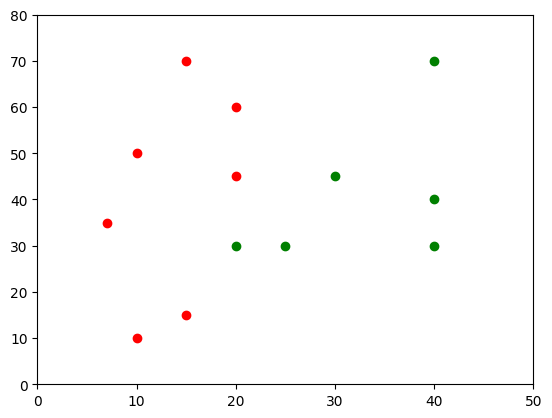

In [ ]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35], [40,70], [10, 10], [15, 15]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1])

plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == -1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == -1], marker='o', color='red')
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == 1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == 1], marker='o', color='green')
plt.xlim(0, max(x_train[:, 0])+10)
plt.ylim(0, max(x_train[:, 1])+10)
plt.show()

In [ ]:
def count(x: np.array, c):
  cnt = 0
  for i in x:
    if i == c: cnt += 1
  return cnt

def dist(index, index2, label):
  sum = 0
  for i in range(len(x_train)):
    if y_train[i] == label:
      sum += np.sqrt((x_train[i][0]-index)**2 + (x_train[i][1]-index2)**2)
      #print(sum)
  #print(sum/count(y_train, label))
  return sum/count(y_train, label)

In [ ]:
print(dist(10, 10, 1))

38.87265457788618


In [ ]:
dist0_massive = []
dist1_massive = []
dist_equel_massive = []
for index in range(max(x_train[:, 0]) + 10):
  for index2 in range(max(x_train[:, 1]) + 10):

    dist_0 = dist(index, index2, 1)
    dist_1 = dist(index, index2, -1)

    if dist_0 > dist_1: dist0_massive.append([index,index2])
    if dist_0 < dist_1: dist1_massive.append([index,index2])
    if dist_0 == dist_1: dist_equel_massive.append([index,index2])

In [ ]:
min_x = -1
point0 = []
for i in dist0_massive:
  if i[0] != min_x:
    min_x = i[0]
    point0.append(i)

In [ ]:
print(len(dist0_massive),dist0_massive)
print(len(dist1_massive),dist1_massive)
print(dist_equel_massive)
print(len(point0) ,point0)

1732 [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], [0, 25], [0, 26], [0, 27], [0, 28], [0, 29], [0, 30], [0, 31], [0, 32], [0, 33], [0, 34], [0, 35], [0, 36], [0, 37], [0, 38], [0, 39], [0, 40], [0, 41], [0, 42], [0, 43], [0, 44], [0, 45], [0, 46], [0, 47], [0, 48], [0, 49], [0, 50], [0, 51], [0, 52], [0, 53], [0, 54], [0, 55], [0, 56], [0, 57], [0, 58], [0, 59], [0, 60], [0, 61], [0, 62], [0, 63], [0, 64], [0, 65], [0, 66], [0, 67], [0, 68], [0, 69], [0, 70], [0, 71], [0, 72], [0, 73], [0, 74], [0, 75], [0, 76], [0, 77], [0, 78], [0, 79], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1, 24], [1, 25], [1, 26], [1, 27], [1, 28], [1, 29], [1, 30], [1, 31], [1, 32

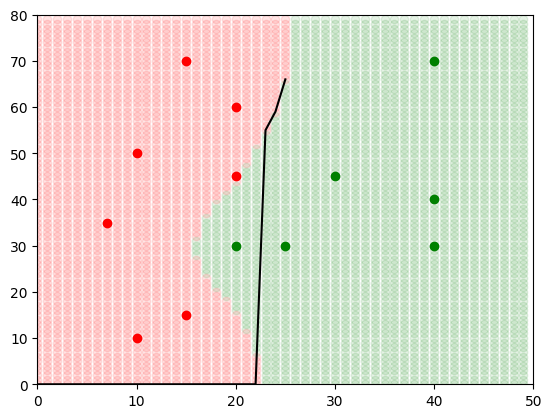

In [ ]:
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == -1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == -1], marker='o', color='red')
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == 1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == 1], marker='o', color='green')
plt.scatter([i[0] for i in dist1_massive], [i[1] for i in dist1_massive], marker='o', color='green', alpha=0.1)
plt.scatter([i[0] for i in dist0_massive], [i[1] for i in dist0_massive], marker='o', color='red', alpha=0.1)
plt.plot([i[0] for i in point0], [i[1] for i in point0], color='black')
plt.xlim(0, max(x_train[:, 0])+10)
plt.ylim(0, max(x_train[:, 1])+10)
plt.show()

Апроксимация полученных точек до прямой

In [ ]:
x, y = np.array([i[0] for i in point0]), np.array([i[1] for i in point0])

mx = np.sum(x)/len(x)
my = np.sum(y)/len(x)
a2 = np.dot(x.T, x)/len(x)
a11 = np.dot(x.T, y)/len(x)

kk = (a11 - mx*my)/(a2 - mx**2)
bb = my - kk*mx

ff = np.array([kk*z+bb for z in range(len(x))])

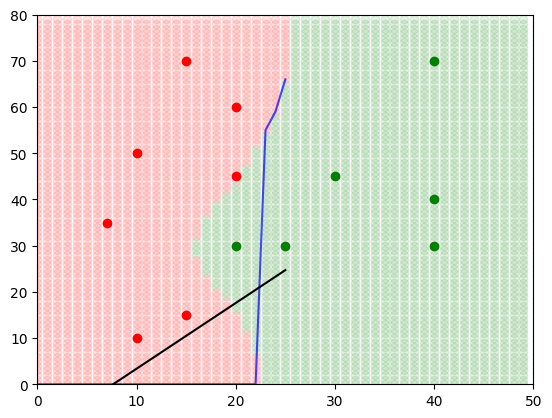

In [ ]:
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == -1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == -1], marker='o', color='red')
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == 1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == 1], marker='o', color='green')
plt.scatter([i[0] for i in dist1_massive], [i[1] for i in dist1_massive], marker='o', color='green', alpha=0.1)
plt.scatter([i[0] for i in dist0_massive], [i[1] for i in dist0_massive], marker='o', color='red', alpha=0.1)
plt.plot([i[0] for i in point0], [i[1] for i in point0], color='blue', alpha=0.7)
plt.plot([i for i in range(len(ff))], [i for i in ff], color='black')
plt.xlim(0, max(x_train[:, 0])+10)
plt.ylim(0, max(x_train[:, 1])+10)
plt.show()